# Argentina stats on novel COVID-19 pandemic #

#### The following notebook is based on https://worldometers.info data and https://github.com/CSSEGISandData data. COVID-19 is currently a global pandemic affecting 204 countries and territories around the world. 
#### The objective of this notebook is to provide updated information on Argentina's COVID-19 cases comparing it to other countries of the region and the world, and provide some statistical analysis on them.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

confirmed_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
recovered_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
death_cases     = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

In [3]:
#arg_confirmed_cases = pd.read_csv("argentina_covid_19_data/argentina-Confirmed.csv", encoding = "ISO-8859-1")
arg_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']) == "Argentina"]
arg_recovered_cases = pd.read_csv("argentina_covid_19_data/argentina-Recovered.csv", encoding = "ISO-8859-1")
arg_death_cases     = pd.read_csv("argentina_covid_19_data/argentina-Deaths.csv", encoding = "ISO-8859-1")
arg_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,1613928,1625514,1629594,1634834,1640718,1648940,1662730,1676171,1690006,1703352


In [4]:
#arg_confirmed = arg_confirmed_cases.loc[(arg_confirmed_cases['Country/Region'] == 'Argentina') 
#                & (arg_confirmed_cases['Province/State'] == 'All')]

arg_confirmed = arg_confirmed_cases
#arg_confirmed = arg_confirmed.drop(['Province/State'], axis=1)
arg_confirmed = arg_confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1)
arg_confirmed = arg_confirmed.set_index('Country/Region')

# argentina_total = 0
# total_list = []
# for index, rows in arg_confirmed.iterrows():
#     for date, cases in rows.items():
#         argentina_total += cases
#         total_list.append({date: argentina_total})

# tot_cases = np.diag(pd.DataFrame(total_list))
# arg_confirmed_ts = arg_confirmed.copy()

# i = 0
# for index, rows in arg_confirmed_ts.iterrows():
#     print(index)
#     print(rows)
#     for date, cases in rows.items():
#         arg_confirmed_ts.at[index, date] = tot_cases[i]
#         i += 1

arg_confirmed_ts = arg_confirmed
tot_days = np.size(arg_confirmed_ts, axis = 1)
# arg_confirmed_ts

arg_confirmed_cp = arg_confirmed.copy()
confirmed_list = []
for index, rows in arg_confirmed.iterrows():
    last_confirmed = 0
    for date, confirmed in rows.items():
        if last_confirmed > 0:
            arg_confirmed_cp[date] = confirmed - last_confirmed
        
        last_confirmed = confirmed


arg_confirmed = arg_confirmed_cp

In [5]:
from IPython.display import Markdown

Markdown("""
Argentina's outbreak started at 03/03/2020, when the first case was confirmed in Ciudad de Buenos Aires. The current total is {total} 
""".format(total=argentina_total))

NameError: name 'argentina_total' is not defined

## Argentina and other countries in the region

We will now compare Argentina and all latin-american countries in the region, to see the progress that the virus has made on the region

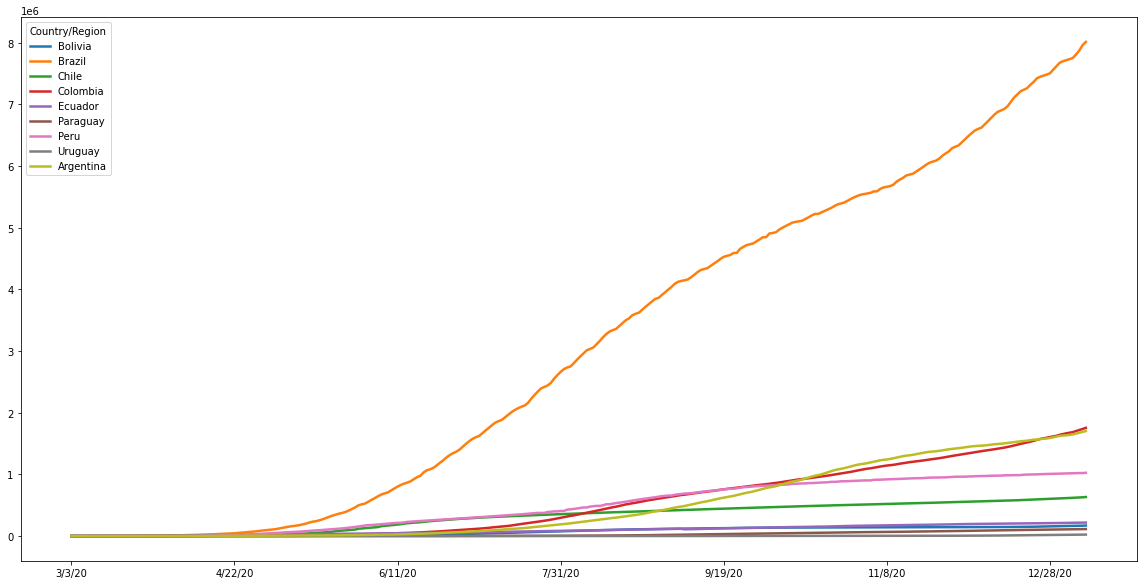

In [6]:
latam_countries = ['Brazil', 'Chile', 'Uruguay', 'Bolivia', 'Paraguay', 'Ecuador', 'Peru', 'Venezeula', 'Colombia']
latam_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(latam_countries)]

latam_confirmed_cases = latam_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis=1)
latam_confirmed_cases = latam_confirmed_cases.set_index('Country/Region')
latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_confirmed_cases = latam_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
latam_confirmed_cases = latam_confirmed_cases[41:]
latam_confirmed_cases.plot(figsize=(20,10), linewidth=2.5);

#### Total confirmed cases over 1M population

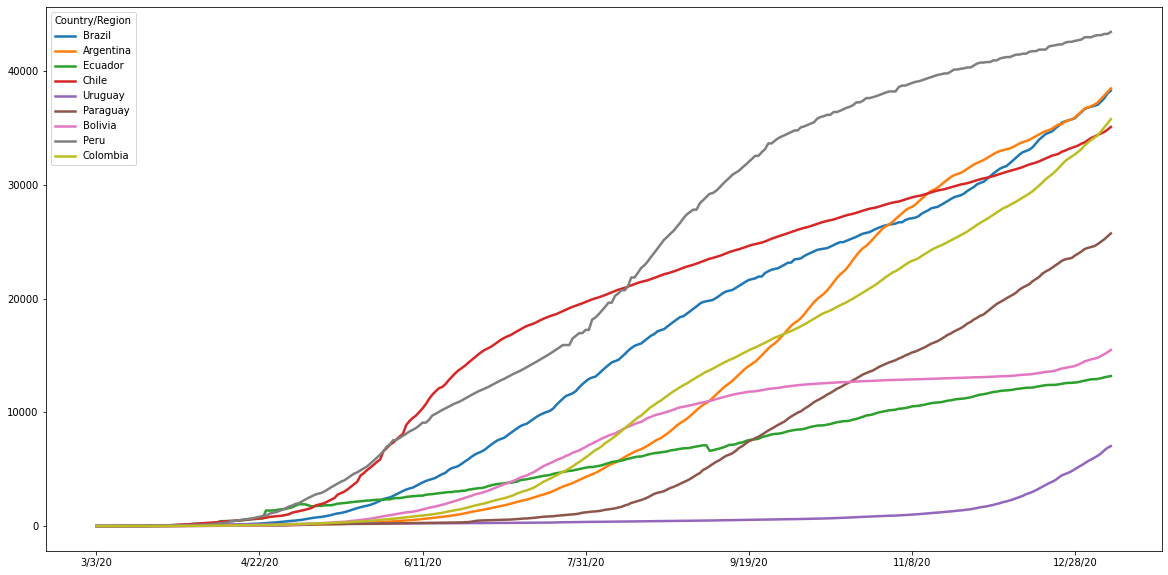

In [7]:
total_populations = {
    'Brazil': 209.3,
    'Argentina': 44.27,
    'Ecuador': 16.62,
    'Chile': 18.05,
    'Uruguay': 3.46,
    'Paraguay': 4.43,
    'Bolivia': 11.05,
    'Peru': 23.62,
    'Venezeula': 31.98,
    'Colombia': 49.07
}

latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations.items():
    country_cases = latam_confirmed_cases.loc[latam_confirmed_cases.index == country]
    latam_conf_cases_by_pop = latam_conf_cases_by_pop.append(country_cases.div(pop))
    
latam_conf_cases_by_pop.transpose().plot(figsize=(20,10), linewidth=2.5);

## Argentina and european countries

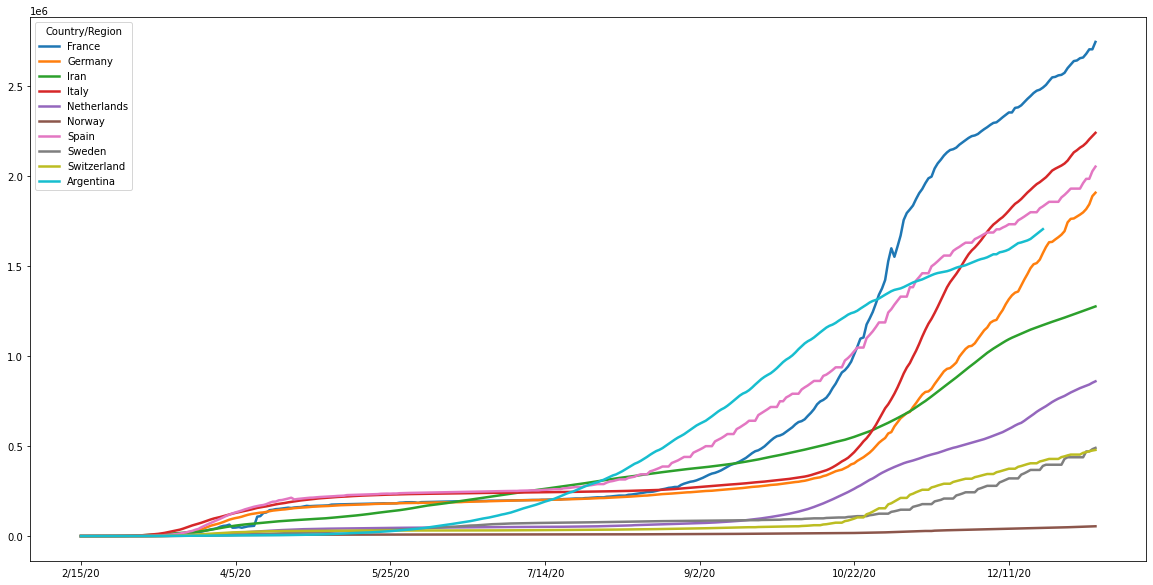

In [8]:
euro_countries = ['Italy', 'Iran', 'Spain', 'Germany', 'France', 'Switzerland', 'UK', 'Netherlands', 'Norway', 'Sweden']
euro_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(euro_countries)]
euro_confirmed_cases = euro_confirmed_cases.loc[(euro_confirmed_cases['Province/State']).isna()]
euro_confirmed_cases = euro_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis = 1)
euro_confirmed_cases = euro_confirmed_cases.set_index('Country/Region')
euro_confirmed_cases = euro_confirmed_cases.transpose()

euro_confirmed_cases = euro_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
euro_confirmed_cases = euro_confirmed_cases[24:]
euro_confirmed_cases['Argentina'] = euro_confirmed_cases['Argentina'].shift(-17)
euro_confirmed_cases = euro_confirmed_cases[:tot_days]
euro_confirmed_cases.plot(figsize=(20,10), linewidth=2.5);

#### Total confirmed cases over 1M population

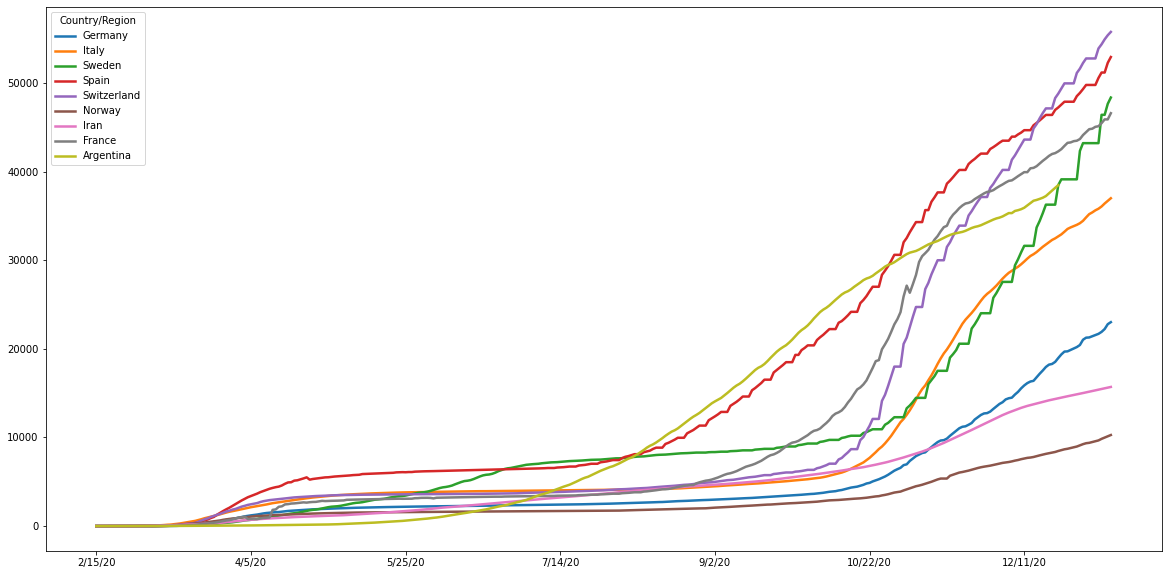

In [9]:
total_populations_eu = {
    'Germany': 82.79,
    'Italy': 60.48,
    'Sweden': 10.12,
    'Spain': 38.73,
    'Switzerland': 8.57,
    'Norway': 5.3,
    'Iran': 81.16,
    'France': 58.85,
    'Argentina': 44.27,
}

euro_confirmed_cases = euro_confirmed_cases.transpose()
euro_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations_eu.items():
    country_cases = euro_confirmed_cases.loc[euro_confirmed_cases.index == country]
    euro_conf_cases_by_pop = euro_conf_cases_by_pop.append(country_cases.div(pop))
    
euro_conf_cases_by_pop.transpose().plot(figsize=(20,10), linewidth=2.5);

## Predicting future outcomes with current data

### Incubation Period

Current data indicates that the mean incubation period is 8.62 (95% CI : 8.02-9.28 days), and that the distribution function that best fits the data is:

$$ g(v) = \alpha \lambda \frac{exp(-(v\lambda)^\alpha)}{\Gamma(1/\alpha)} $$

The best estimators found (via likelihood) were:

$ \hat{\alpha} = 2.04 $

$ \hat{\lambda} = 0.103 $

For references check: https://www.researchgate.net/publication/339846092_Estimation_of_incubation_period_distribution_of_COVID-19_using_disease_onset_forward_time_a_novel_cross-sectional_and_forward_follow-up_study

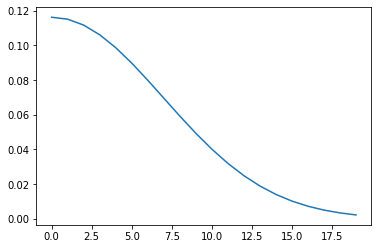

In [15]:
import math

alpha_hat = 2.04
lambda_hat = 0.103

def g(v):
    a = -math.pow(v*lambda_hat, alpha_hat)
    b = math.gamma(1 / alpha_hat)
    return alpha_hat * lambda_hat * (math.exp(a)/ b)


X = np.arange(0, 20)
plt.plot(X, [g(x) for x in X]);

### Daily new cases histogram in Argentina

We now present a histogram of the daily cases in Argentina. We must then analyze this data to predict future outcomes based on the incubation period described before.

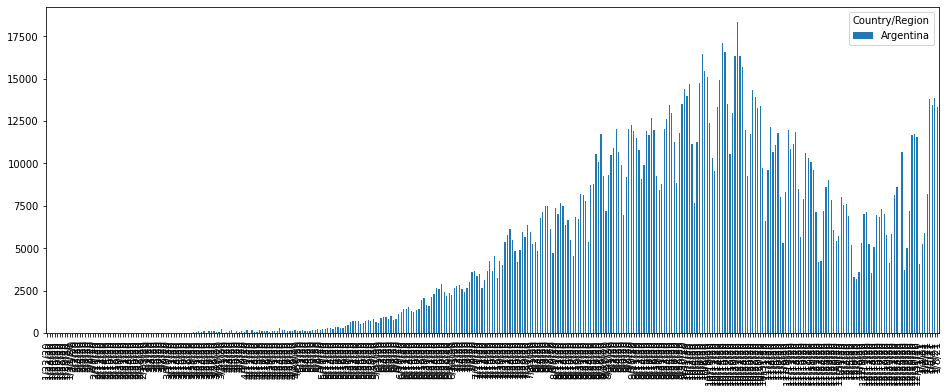

In [11]:
arg_confirmed.transpose().plot(kind="bar", figsize=(16,6));

Assume the attack rate or transmissibility (Ro), which is, how rapidly the disease spreads, of 2. This represents the average number of people to which a single infected person will transmit the virus.

See: 

- https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3524675

- https://www.imperial.ac.uk/mrc-global-infectious-disease-analysis/news--wuhan-coronavirus/

### Predicting outcomes with a constant positive transmission rate greather than 1

In [12]:
# This predictor obtainer, is good for simulating data with an init dictionary of 1.
# Which basically means it does not care about the empirical data, it just wants to find the best fitting function
# for the data
# The ther model, uses the current data to get its proyected data, up until there is no more data, and is therefore
# more "true" to the empirical data, but nevertheless it does not give a good fit function because the functions
# does not solely simulate (it relies on some other function which is the empirical data driving force). 
# But in contrast, it may be a better projection, since all of it its built on the empirical data, and not driven
# by some function that is just plain wrong.
# Therefore these are 2 distinct models, but they can be used interchangeably.

# TODO: Refactor this funcions, they have PRETTY MUCH the same functionality....

'''
from datetime import datetime, timedelta
from collections import OrderedDict
from dateutil.parser import parse

def ro(curve, value = None, x = None):
    if curve == 'constant':
        # ro(x) = a
        key = "a"
        return value[key]
    elif curve == 'linear':
        # ro(x) = a*x + b
        key_1 = "a"
        key_2 = "b"
        a = value[key_1]
        b = value[key_2]
        return a*x + b
    elif curve == 'exponential':
        # ro(x) = a*exp(-bt)
        key_1 = "a"
        key_2 = "b"
        a = value[key_1]
        b = value[key_2]
        return a*np.exp(b*x)
    
def obtain_prediction(ro, ro_type, ro_value, init_date, list_dates, init_cases, max_iter = 90, force_end = False):
    days_passed = 0
    for i in range(0, len(list_dates)):
        date = list_dates[i]
        _date = date.strftime("%-m/%-d/%y")
        if _date in init_cases:
            new_cases = ro(ro_type, ro_value, days_passed)
            if(new_cases > 0.5 and new_cases < 1):
                new_cases = 1
            elif(new_cases < 0.5):
                new_cases = 0
                
            days_passed += 1
            gaussian = -1
            for __ in range(0, int(round(init_cases[_date]))):
                gaussian = np.random.normal(mu + days_passed, sigma)
                f_day = np.ceil(gaussian)
                end_date = init_date + timedelta(f_day)
                end_date = end_date.strftime("%-m/%-d/%y")
                if end_date in init_cases:
                    init_cases[end_date] = new_cases + init_cases[end_date]
                else:
                    init_cases[end_date] = new_cases
        
        if i > max_iter and new_cases < 20:
            break
        elif i > max_iter and force_end:
            break
    return OrderedDict(sorted(init_cases.items(), key = lambda x: parse(x[0])))

def get_clean_dict(arg_dataframe):
    dict_arg_confirmed = arg_dataframe.to_dict()
    temp = {}
    for date, cases in dict_arg_confirmed.items():
        for _, num_cases in cases.items():
            temp[date] = num_cases
    return temp

dict_arg_confirmed = get_clean_dict(arg_confirmed)

# Constrains
init_date = datetime.strptime('3/3/20', '%m/%d/%y')
list_dates = pd.date_range(init_date, periods = 2000).tolist()

dict_arg_predicted = obtain_prediction(ro, 'constant', {"a": 2}, init_date, list_dates, dict_arg_confirmed, max_iter = 75, force_end = True)

arg_predicted = pd.DataFrame([dict_arg_predicted], columns=dict_arg_predicted.keys())

#todo
length = len(dict_arg_predicted)
bins = [k for k in range(1, length)]
confirmed = list(dict_arg_confirmed.values())
predicted = list(dict_arg_predicted.values())

# Graph if ro = 2
arg_predicted.transpose()[:-8].plot(kind="bar", figsize=(20, 10))
''';

Stopped at: 6/22/20


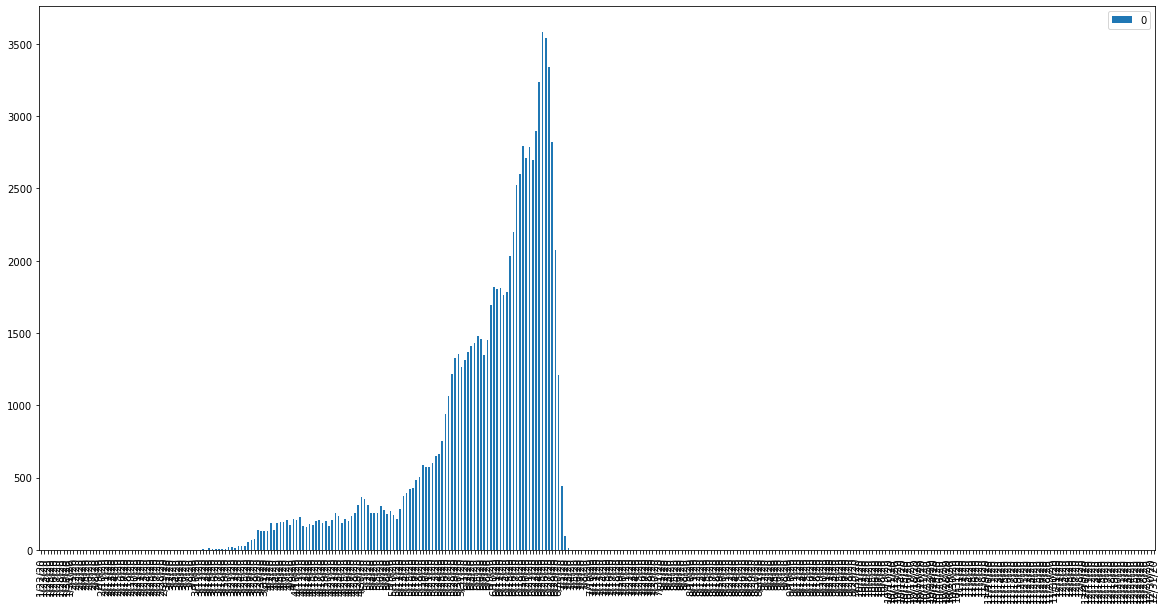

In [13]:
from datetime import datetime, timedelta
from collections import OrderedDict
from dateutil.parser import parse

def ro(curve, value = None, x = None):
    if curve == 'constant':
        # ro(x) = a
        key = "a"
        return value[key]
    elif curve == 'linear':
        # ro(x) = a*x + b
        key_1 = "a"
        key_2 = "b"
        a = value[key_1]
        b = value[key_2]
        return a*x + b
    elif curve == 'exponential':
        # ro(x) = a*exp(-bt)
        key_1 = "a"
        key_2 = "b"
        a = value[key_1]
        b = value[key_2]
        return a*np.exp(b*x)


# Obtains prediction from an empirical set.
# For the dates that the empirical set has, it projects the data from the empirical set via some probability function
# If the date is contained in an empirical set, it will use that data for projecting, instead of the created data
# If the date is posterior to the empirical set, then it will start using the created data to project.
def obtain_prediction(ro, ro_type, ro_value, init_date, list_dates, init_cases, max_iter = 100, force_end = False):
    days_passed = 0
    predicted_cases = init_cases.fromkeys(init_cases, 0)
    for i in range(0, len(list_dates)):
        date = list_dates[i]
        _date = date.strftime("%-m/%-d/%y")
        if _date in init_cases:
            new_cases = ro(ro_type, ro_value, days_passed)
            if(new_cases > 0.5 and new_cases < 1):
                new_cases = 1
            elif(new_cases < 0.5):
                new_cases = 0
                
            days_passed += 1
            gaussian = -1
            for __ in range(0, int(round(init_cases[_date]))):
                gaussian = np.random.normal(mu + days_passed, sigma)
                f_day = np.ceil(gaussian)
                end_date = init_date + timedelta(f_day)
                end_date = end_date.strftime("%-m/%-d/%y")
                if end_date in predicted_cases:
                    predicted_cases[end_date] = new_cases + predicted_cases[end_date]
                else:
                    predicted_cases[end_date] = new_cases
        
        elif _date in predicted_cases:
            new_cases = ro(ro_type, ro_value, days_passed)
            if(new_cases > 0.5 and new_cases < 1):
                new_cases = 1
            elif(new_cases < 0.5):
                new_cases = 0
                
            days_passed += 1
            gaussian = -1
            for __ in range(0, int(round(predicted_cases[_date]))):
                gaussian = np.random.normal(mu + days_passed, sigma)
                f_day = np.ceil(gaussian)
                end_date = init_date + timedelta(f_day)
                end_date = end_date.strftime("%-m/%-d/%y")
                if end_date in predicted_cases:
                    predicted_cases[end_date] = new_cases + predicted_cases[end_date]
                else:
                    predicted_cases[end_date] = new_cases            
        
        
        if i > max_iter and new_cases < 20:
            print("Stopped at: " + str(_date))
            break
        elif i > max_iter and force_end:
            print("Stopped at: " + str(_date))
            break
    return OrderedDict(sorted(predicted_cases.items(), key = lambda x: parse(x[0])))

def get_clean_dict(arg_dataframe):
    dict_arg_confirmed = arg_dataframe.to_dict()
    temp = {}
    for date, cases in dict_arg_confirmed.items():
        for _, num_cases in cases.items():
            temp[date] = num_cases
    return temp

dict_arg_confirmed = get_clean_dict(arg_confirmed)

# Constrains
init_date = datetime.strptime('3/3/20', '%m/%d/%y')
list_dates = pd.date_range(init_date, periods = 2000).tolist()

dict_arg_predicted = obtain_prediction(ro, 'constant', {"a": 2}, init_date, list_dates, dict_arg_confirmed, max_iter = 110, force_end = True)

arg_predicted = pd.DataFrame([dict_arg_predicted], columns=dict_arg_predicted.keys())

#todo
length = len(dict_arg_predicted)
bins = [k for k in range(1, length)]
confirmed = list(dict_arg_confirmed.values())
predicted = list(dict_arg_predicted.values())

# Graph if ro = 2
arg_predicted.transpose()[:-8].plot(kind="bar", figsize=(20, 10));

With a constant rate of transmission, greather than 1, it is evident that the amount of cases will grow exponentially, bounded by the total population.

### Predicting outcomes with a varying transmission rate

Stopped at: 6/12/20


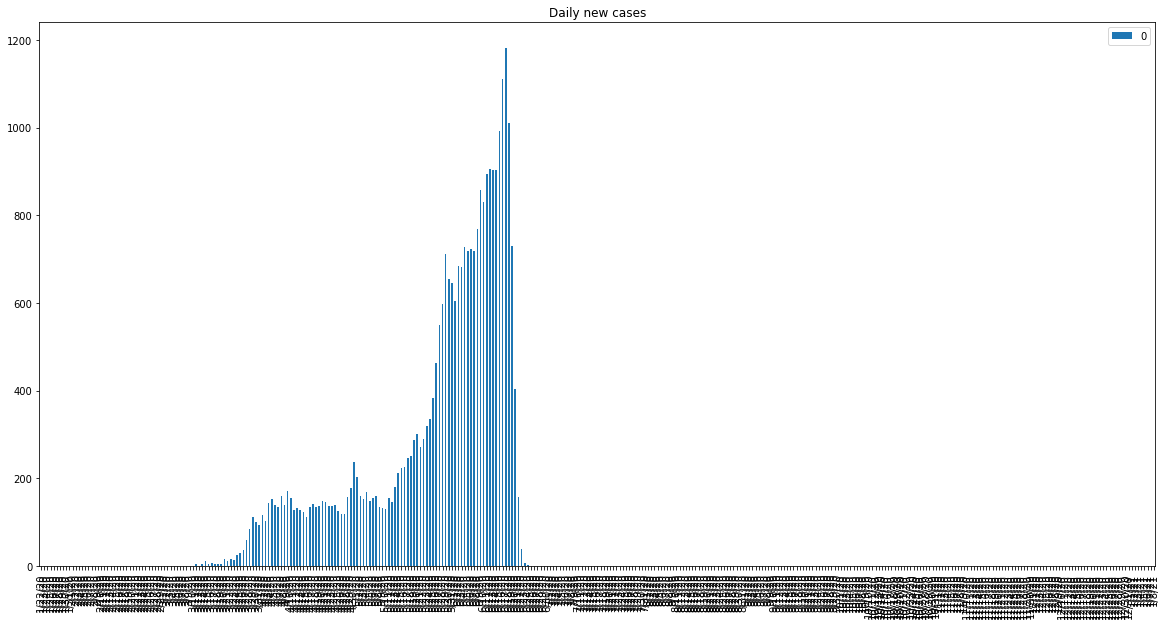

In [14]:
list_dates = pd.date_range(init_date, periods = 2000).tolist()
dict_arg_confirmed = get_clean_dict(arg_confirmed)
init_date = datetime.strptime('3/3/20', '%m/%d/%y')

dict_arg_predicted = obtain_prediction(ro, 'exponential', {"a": 2, "b": -0.01}, init_date, list_dates, dict_arg_confirmed)
arg_predicted = pd.DataFrame([dict_arg_predicted], columns=dict_arg_predicted.keys())

arg_predicted.transpose().plot(kind="bar", figsize=(20, 10), title = "Daily new cases");

#### Finding the best exponential fit for current data

There are multiple models that could simulate the virus propagation, our task is to find the best model for the current known data.

In [15]:
list_dates = pd.date_range(init_date, periods = 2000).tolist()
dict_arg_confirmed = get_clean_dict(arg_confirmed)
init_date = datetime.strptime('3/3/20', '%m/%d/%y')
samples = 100
totals_predicted = {}
#average_predicted_list = []
totals_predicted_list = []
a_vars = [x for x in np.arange(1.5, 2.5, 0.25)]
b_vars = [x for x in np.arange(-0.03, 0, 0.005)]
init_dict = {'3/3/20': 1}

for a in a_vars:
    for b in b_vars:
        print(a, b)
        #for i in range(samples):
        dict_arg_predicted = obtain_prediction(ro, 'exponential', {"a": a, "b": b}, init_date, list_dates, dict_arg_confirmed, max_iter = 200, force_end = True)
        for date, cases in dict_arg_predicted.items():
            if date in totals_predicted:
                totals_predicted[date] += cases
            else:
                totals_predicted[date] = cases

        init_dict = {'3/3/20': 1}
        #dict_arg_confirmed = get_clean_dict(arg_confirmed)

        #average_predicted = {k: round(v/samples, 0) for k, v in totals_predicted.items()}
        totals_predicted_list.append(totals_predicted)
        totals_predicted = {}
    

1.5 -0.03
Stopped at: 9/20/20
1.5 -0.024999999999999998
Stopped at: 9/20/20
1.5 -0.019999999999999997
Stopped at: 9/20/20
1.5 -0.014999999999999996
Stopped at: 9/20/20
1.5 -0.009999999999999995
Stopped at: 9/20/20
1.5 -0.004999999999999994
Stopped at: 9/20/20
1.75 -0.03
Stopped at: 9/20/20
1.75 -0.024999999999999998
Stopped at: 9/20/20
1.75 -0.019999999999999997
Stopped at: 9/20/20
1.75 -0.014999999999999996
Stopped at: 9/20/20
1.75 -0.009999999999999995
Stopped at: 9/20/20
1.75 -0.004999999999999994
Stopped at: 9/20/20
2.0 -0.03
Stopped at: 9/20/20
2.0 -0.024999999999999998
Stopped at: 9/20/20
2.0 -0.019999999999999997
Stopped at: 9/20/20
2.0 -0.014999999999999996
Stopped at: 9/20/20
2.0 -0.009999999999999995
Stopped at: 9/20/20
2.0 -0.004999999999999994
Stopped at: 9/20/20
2.25 -0.03
Stopped at: 9/20/20
2.25 -0.024999999999999998
Stopped at: 9/20/20
2.25 -0.019999999999999997
Stopped at: 9/20/20
2.25 -0.014999999999999996
Stopped at: 9/20/20
2.25 -0.009999999999999995
Stopped at: 9/2

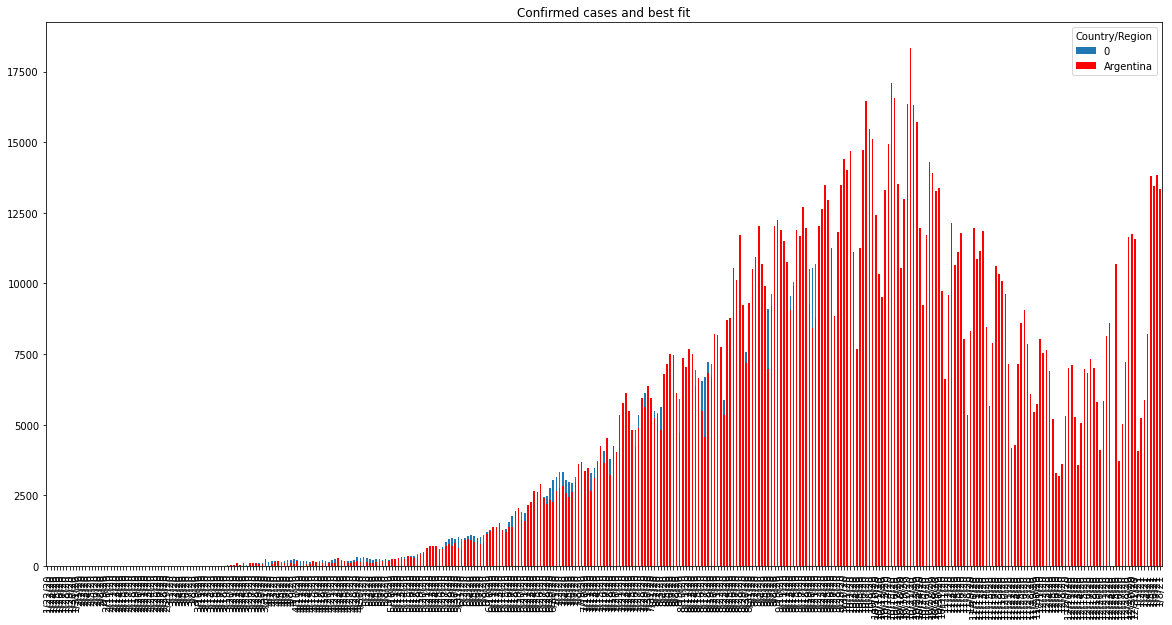

In [16]:
dict_arg_confirmed = get_clean_dict(arg_confirmed)
accum_dist = 0
best_dist = np.inf
best_average = {}

#for average_predicted in average_predicted_list:
for total_predicted in totals_predicted_list:
    #avg_pre = OrderedDict(sorted(average_predicted.items(), key = lambda x: parse(x[0])))
    tot_pre = OrderedDict(sorted(total_predicted.items(), key = lambda x: parse(x[0])))
    for date, confirmed_cases in dict_arg_confirmed.items():
        if date in tot_pre: #avg_pre:
            cases = tot_pre[date] #avg_pre[date]
            accum_dist += (confirmed_cases - cases)**2
        else:
            accum_dist += confirmed_cases**2
    
    if accum_dist < best_dist:
        best_dist = accum_dist
        best_average = tot_pre

    #avg_pre_df = pd.DataFrame([avg_pre], columns=avg_pre.keys())
    tot_pre_df = pd.DataFrame([tot_pre], columns=tot_pre.keys())
    
    accum_dist = 0

best_avg_df = pd.DataFrame([best_average], columns=best_average.keys())

fig = plt.figure()
ax = fig.add_subplot(111)
best_avg_df.transpose().plot(kind="bar", ax = ax, figsize=(20, 10), title = "Confirmed cases and best fit")
arg_confirmed.transpose().plot(kind="bar", ax = ax, figsize=(20, 10), color='red');

#### Best model 15/06/2020

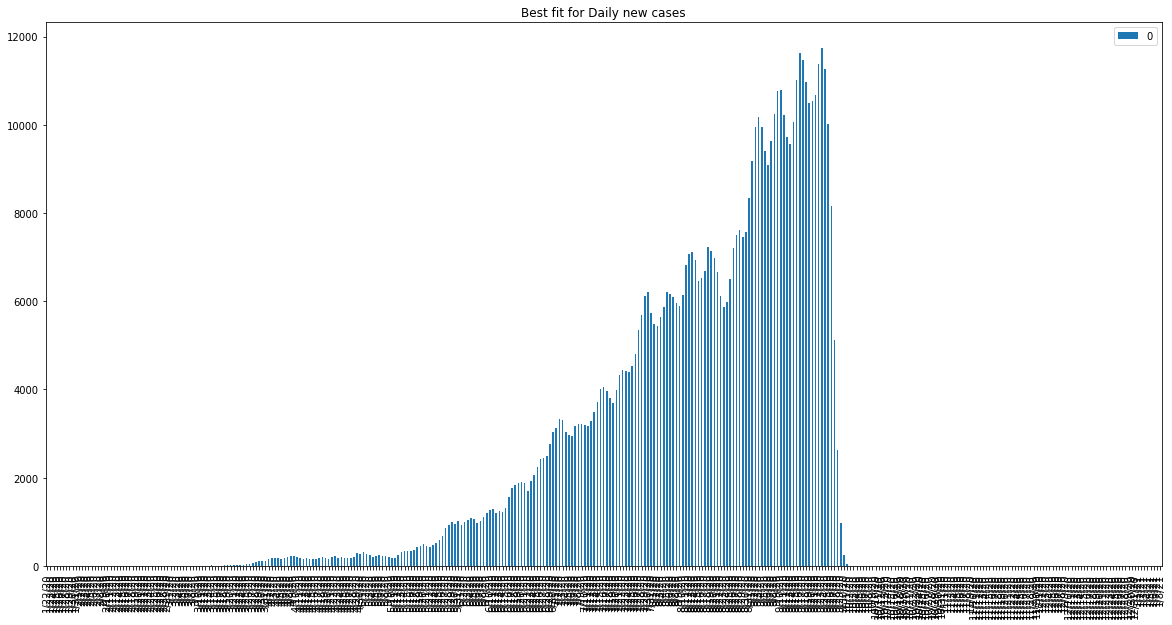

In [17]:
best_avg_df.transpose().plot(kind="bar", figsize=(20, 10), title="Best fit for Daily new cases");

This is the current best fit for the current data with $ 2 \leq a < 3.5 $ with $ 0.5 $ steps and $ b = -0.03 $ limiting runs because of poor computational proccessing power.

### Predicting outcomes with a discontinuous varying transmission rate

We look now to vary the transmission rate via a disctontinuous function, intending to get a more satisfying prediction for the quarantine measures taken in Argentina from 20/03/2020 onwards. The transmission rate should decrease significantly after the quarantine started.

In [18]:
# todo

### Predicting outcome via daily new cases data

Instead of trying to calculate the apparent transmission rate, we will now consider the daily new cases data and find a logistic model that fits it.

#### Logistic model

The logistic model is frequently used to model the growth of populations. It seems reasonable then to assume that the current pandemic, which grows as a pathogen in the population, can be modeled by it.

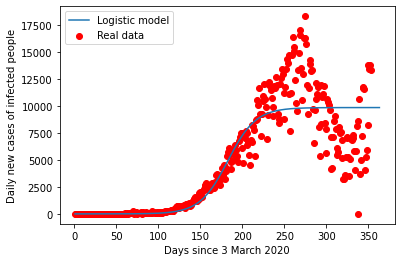

In [19]:
from scipy.optimize import curve_fit

def logistic_model(x, a, b, c):
    return c/(1 + np.exp( -(x-b) / a))

def line(x,m,n):
    return x*m+n

dict_arg_confirmed = get_clean_dict(arg_confirmed)
days_data = {}
day = 1
for date, cases in dict_arg_confirmed.items():
    days_data[day] = cases
    day += 1

days_data_df = pd.DataFrame([days_data], columns=days_data.keys())
x = list(days_data.keys())
y = list(days_data.values())

fut_x = [i for i in range(x[-1] + 1, x[-1] + 11)]
pred_x = x + fut_x

logistic_fit = curve_fit(logistic_model, x, y, maxfev = 10000)
errors = [np.sqrt(logistic_fit[1][i][i]) for i in [0,1,2]]

# Real data
plt.scatter(x, y, label="Real data", color="red")

# Predicted exponential curve
plt.plot(pred_x, [logistic_model(i, logistic_fit[0][0], logistic_fit[0][1], logistic_fit[0][2]) for i in pred_x], label="Logistic model")

plt.legend()
plt.xlabel("Days since 3 March 2020")
plt.ylabel("Daily new cases of infected people")
plt.show()

#### Exponential model

The logistic model is of course more realistic because it stops at some time in the future, the exponential one is unbounded, therefore it is used to see the current growth and the expected number of cases in the near future, since it will always end up looking like a logistic anyways.

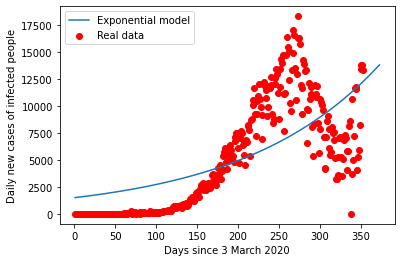

In [20]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

x = list(days_data.keys())
y = list(days_data.values())

fut_x = [i for i in range(x[-1] + 1, x[-1] + 21)]
pred_x = x + fut_x

exp_fit = curve_fit(exponential_model, x, y, maxfev = 10000)

# Real data
plt.scatter(x, y, label="Real data", color="red")

# Predicted exponential curve
plt.plot(pred_x, [exponential_model(i, exp_fit[0][0], exp_fit[0][1], exp_fit[0][2]) for i in pred_x], label="Exponential model")

plt.legend()
plt.xlabel("Days since 3 March 2020")
plt.ylabel("Daily new cases of infected people")
plt.show()

#### Linear model

Although virus outbreaks are exponential in nature, society response adds a variability that could then make the spread linear. Also a linear model is generally good to have a notion of the current tendency of the disease in question.

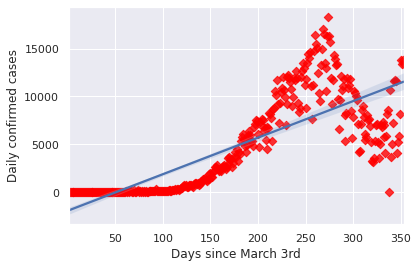

In [21]:
import seaborn as sns

x = list(days_data.keys())
y = list(days_data.values())

x, y = pd.Series(x, name="Days since March 3rd"), pd.Series(y, name="Daily confirmed cases")
sns.set(color_codes = True)
ax = sns.regplot(x = x, y = y, marker = 'D', scatter_kws={"color": "red"})

#### Residual analysis, errors and comparison of models

In [22]:
# todo

## Getting actual infected cases from diagnosed cases


In [23]:
# todo

## Cases in Argentinian provinces (Outdated)

#### Daily cases time series for Argentina

<AxesSubplot:>

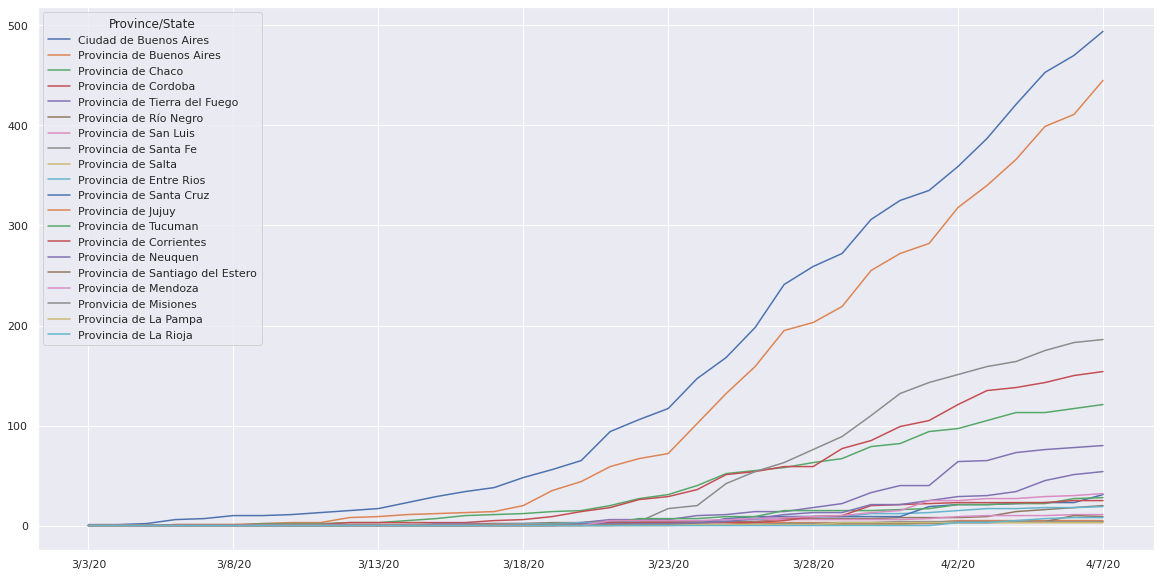

In [24]:
arg_confirmed_cases = pd.read_csv("argentina_covid_19_data/argentina-Confirmed.csv", encoding = "ISO-8859-1")
arg_confirmed_cases = arg_confirmed_cases.drop(['Country/Region'], axis=1)
arg_confirmed_cases = arg_confirmed_cases.loc[arg_confirmed_cases['Province/State'] != 'All']
arg_confirmed_cases = arg_confirmed_cases.set_index('Province/State')

arg_confirmed_cases_copy = arg_confirmed_cases.copy()
arg_confirmed_ts = arg_confirmed_cases.copy()
total = 0
time_series_list = []
for index, rows in arg_confirmed_cases_copy.iterrows():
    cases_dict = {}
    for date, cases in rows.items():
        total += cases
        arg_confirmed_ts.at[index, date] = total
        
    total = 0

arg_confirmed_ts.transpose().plot(figsize = (20, 10))

In [25]:
from IPython.display import Markdown

infected_provinces = len(arg_confirmed_cases)
current_date = "30/03/2020"

Markdown("""
Argentina has 23 provinces and one autonomous city (city of Buenos Aires).
As of {current_date} the current provinces with COVID-19 confirmed cases are {infected_provinces}. 
""".format(infected_provinces=infected_provinces, current_date=current_date))


Argentina has 23 provinces and one autonomous city (city of Buenos Aires).
As of 30/03/2020 the current provinces with COVID-19 confirmed cases are 20. 


#### Total confirmed cases over 1M population

<AxesSubplot:>

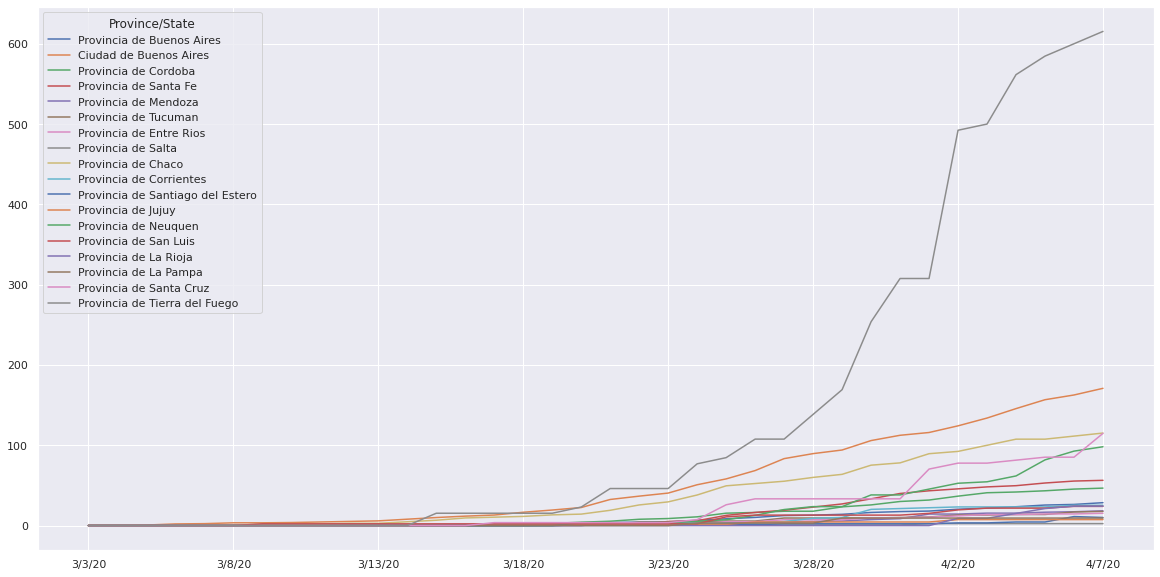

In [26]:
total_populations_arg = {
    'Provincia de Buenos Aires': 15.59,
    'Ciudad de Buenos Aires': 2.89,
    'Provincia de Cordoba': 3.30,
    'Provincia de Santa Fe': 3.30,
    'Provincia de Mendoza': 1.74,
    'Provincia de Tucuman': 1.59,
    'Provincia de Entre Rios': 1.24,
    'Provincia de Salta': 1.22,
    'Provincia de Misiones': 1.09,
    'Provincia de Chaco': 1.05,
    'Provincia de Corrientes': 0.99,
    'Provincia de Santiago del Estero': 0.89,
    'Provincia de San Juan': 0.68,
    'Provincia de Jujuy': 0.67,
    'Provincia de Rio Negro': 0.63,
    'Provincia de Neuquen': 0.55,
    'Provincia de Formosa': 0.53,
    'Provincia de Chubut': 0.50,
    'Provincia de San Luis': 0.46,
    'Provincia de Catamarca': 0.37,
    'Provincia de La Rioja': 0.33,
    'Provincia de La Pampa': 0.32,
    'Provincia de Santa Cruz': 0.27,
    'Provincia de Tierra del Fuego': 0.13
}

arg_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations_arg.items():
    country_cases = arg_confirmed_ts.loc[arg_confirmed_ts.index == country]
    arg_conf_cases_by_pop = arg_conf_cases_by_pop.append(country_cases.div(pop))

arg_conf_cases_by_pop.transpose().plot(figsize = (20, 10))

#### Distribution of cases in each province

In [27]:
#labels = list(total_populations_arg.keys())
#sizes = []
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0, 0.1, 0, 0)
#for province in labels:
#    print(province)
#    print(arg_confirmed_ts.loc[arg_confirmed_cases['Province/State']])
#    prop = arg_confirmed_ts.loc[arg_confirmed_cases['Province/State'] == province]
    
    
#sizes = [40, 20, 20, 20]
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#        autopct='%1.1f%%', shadow=True, startangle=90)
#plt.axis('equal')
#plt.title('Year 2013')
#plt.show()

## Applying the SIR model to Argentina


In [28]:
# todo

## Analyzing communitary transmission

In [29]:
# todo

## Testing: Amount and positive cases

In [30]:
# todo

## Log plots

In [31]:
# todo